# Machine Learning Report

### The aim of this report:

This report aims to apply multiple machine learning algorithms to predict whether a kidney has a chronic disease or not. By using balance sheets which give us values or states of several things in the human body, we will evaluate and compare the performance of the models in order to choose the most robust model. Moreover, we will also decide what are the important features of our best predictive model.


### Summary 

#####  1- Introduction to the problem
#####  2- Business and Data Understanding
#####  3- Data Exploratory Analysis and Data preparation


## 1- Introduction to the problem

Chronic kidney disease (CKD) is a serious life-threatening disease caused by degeneration function of the kidneys. It is top ten leading causes of death in the world and affects approximately 10% of the world adult population.Therefore, artificial intelligence techniques are of great importance in the early detection of CKD. These techniques are supportive of experts and doctors in early diagnosis to avoid developing kidney failure.

## 2- Business and Data Understanding

#### CRISP DM (CRoss Industry Standard Process for Data Mining)
##### Business understanding – What does the business need?
Khamparia et al studied a stacked autoencoder model to extract the characteristics of CKD and used Softmax to classify the final class.
Kim et al proposed a genetic algorithm (GA) based on neural networks in which the weight vectors were optimized by GA to train NN. The system surpasses traditional neural networks for CKD di- agnosis
Pujari et al presented a system for detecting the stages of CKD through ultrasonography (USG) images.The algorithm works to identify fibrotic cases during different periods.
Ahmed et al proposed a fuzzy expert system to determine whether the urinary system is good or bad.


##### Data understanding – What data do we have? Is it clean?

This dataset was taken from UCI machine learning repository. The data was collected from the Apollo Hospital, India by b. Jerlin Rubini and can be used to predict the chronic kidney disease. There are 400 different instances and 24 features. Each instance represents a patient, and features represents informations about the patient and their illnesses. 
These informations of the disease were collected:
* *age*  : numeric : Age in years
* *bp* : numeric : Blood Pressure in mm/Hg
* *sg* : {1.005,1.010,1.015,1.020,1.025} : Specific Gravity
* *al* : {0,1,2,3,4,5} : albumin
* *su* : {0,1,2,3,4,5} : sugar 
* *rbc* : {normal,abnormal} : red blood cell 
* *pc* : {normal,abnormal} : cell pussy 
* *pcc* : {present,notpresent} : Puss Cell Clumps
* *ba* : {present,notpresent} : Bacteria
* *bgr* :  numeric : Blood Glucose Random in mgs/dl
* *bu* : numeric : Blood Urea in mgs/dl
* *sc* : numeric : Serum Creatinine in mgs/dl
* *sod* : numeric : sodium in mEq/L
* *pot* : numeric : potassium in mEq/L
* *hemo* : numeric : Hemoglobin in gms
* *pcv* : numeric : Packet Cell Volume 
* *wbcc* : numeric : White Blood cell count in millions/cmm
* *rbcc* : numeric : Red Blood cell count in millions/cmm
* *htn* : {yes,no} : Hypertension
* *dm* : {yes,no} : Diabetes Mellitus 
* *cad* : {yes,no} : Coronary Artery Disease 
* *appet* : {good,poor} : Appetite
* *pe* : {yes,no} : Pedal Edema
* *ane* : {yes,no} : Anemia
* *classification* : {ckd,notckd} : chronic kidney disease (ckd) and non chronic kidney disease (notckd)


## 3- Data Exploratory Analysis and Data preparation

##### Librarbies importation 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import isnan






##### Data Reading 


In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\kidney_disease.csv');
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


#### Let's transform data columns more fluent 


In [3]:
df.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

##### Verifying the shape of our dataframe as well as the name of columns

In [4]:
print(df.columns)
print(df.shape)

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')
(400, 26)


In [5]:
df=df.drop(columns=['id'],axis=1)

##### Verifying the type of data in our dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

We can notice that our dataframe contains  numeric and categorical Data and contains some null values .
And there are numeric type variables registred as object variables in the database  
So we try to transform it : 

In [7]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

##### let's check for duplicate Values


In [8]:
duplicateDFRow = df[df.duplicated()]

print(duplicateDFRow)

Empty DataFrame
Columns: [age, blood_pressure, specific_gravity, albumin, sugar, red_blood_cells, pus_cell, pus_cell_clumps, bacteria, blood_glucose_random, blood_urea, serum_creatinine, sodium, potassium, haemoglobin, packed_cell_volume, white_blood_cell_count, red_blood_cell_count, hypertension, diabetes_mellitus, coronary_artery_disease, appetite, peda_edema, aanemia, class]
Index: []

[0 rows x 25 columns]


#### Let's check for NaN values and print the statistics of our data
percentage of missing value : 


In [9]:
(df.isnull().sum()/df.shape[0])*100

age                         2.25
blood_pressure              3.00
specific_gravity           11.75
albumin                    11.50
sugar                      12.25
red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
blood_glucose_random       11.00
blood_urea                  4.75
serum_creatinine            4.25
sodium                     21.75
potassium                  22.00
haemoglobin                13.00
packed_cell_volume         17.75
white_blood_cell_count     26.50
red_blood_cell_count       32.75
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
peda_edema                  0.25
aanemia                     0.25
class                       0.00
dtype: float64

In [10]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


#### Extracting categorical and numerical columns



In [11]:
cat_col=[col for col in df.columns if df[col].dtype=="object"]
num_col=[col for col in df.columns if df[col].dtype!="object"]

#### check all the modalities of the categorical variables


In [12]:
for col in cat_col:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



It can be said that there are some modalities that have problems due to the collection of data let's fixe it : 

In [13]:
df.diabetes_mellitus=df["diabetes_mellitus"]. replace( ["\tno",'\tyes'],["no","yes"])
df.coronary_artery_disease= df['coronary_artery_disease'].replace('\tno','no')
df['class']=df['class'].replace("ckd\t","ckd")

In [14]:
for col in df.columns:
    print(df[col].value_counts())

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: blood_pressure, dtype: int64
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: specific_gravity, dtype: int64
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: albumin, dtype: int64
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: sugar, dtype: int64
normal      201
abnormal     47
Name: red_blood_cells, dtype: int64
normal      259
abnormal     76
Name: pus_cell, dtype: int64
notpresent    354
present        42
Name: pus_cell_clumps, dtype: int64
notpresent    374
present        22
Name: bacteria, dtype: int64
99.0     10
93.0      9
100.0     9
107.0     8
131.0     6
         ..
288.0     1
182.0     1
84.0      1
256.0     1
226.

on remarque que "Albumin" , "Specific Gravity" , "Sugar" , "Pus Cell ", "Red Blood Cells" ,"Bacteria " , "Pus Cell clumps " , "Diabète mellitus", "Hypertention" ,"Edema" , "Coronary artery disease" , "Anemia" et "Appetite" sont des variables Nominale . Les autres sont des variables Numérique 
#### Extracting nominal and not nominal columns :


In [15]:
Nominal_col=[col for col in df.columns if (df[col].dtype=="object" or col=='albumin' or col=='specific_gravity' or col=="sugar" )]
not_Nominal_col=[col for col in df.columns if (df[col].dtype!="object" and col!='albumin' and col!='specific_gravity' and col!="sugar" )]

#### traitement of outliers : 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

<function matplotlib.pyplot.show(close=None, block=None)>

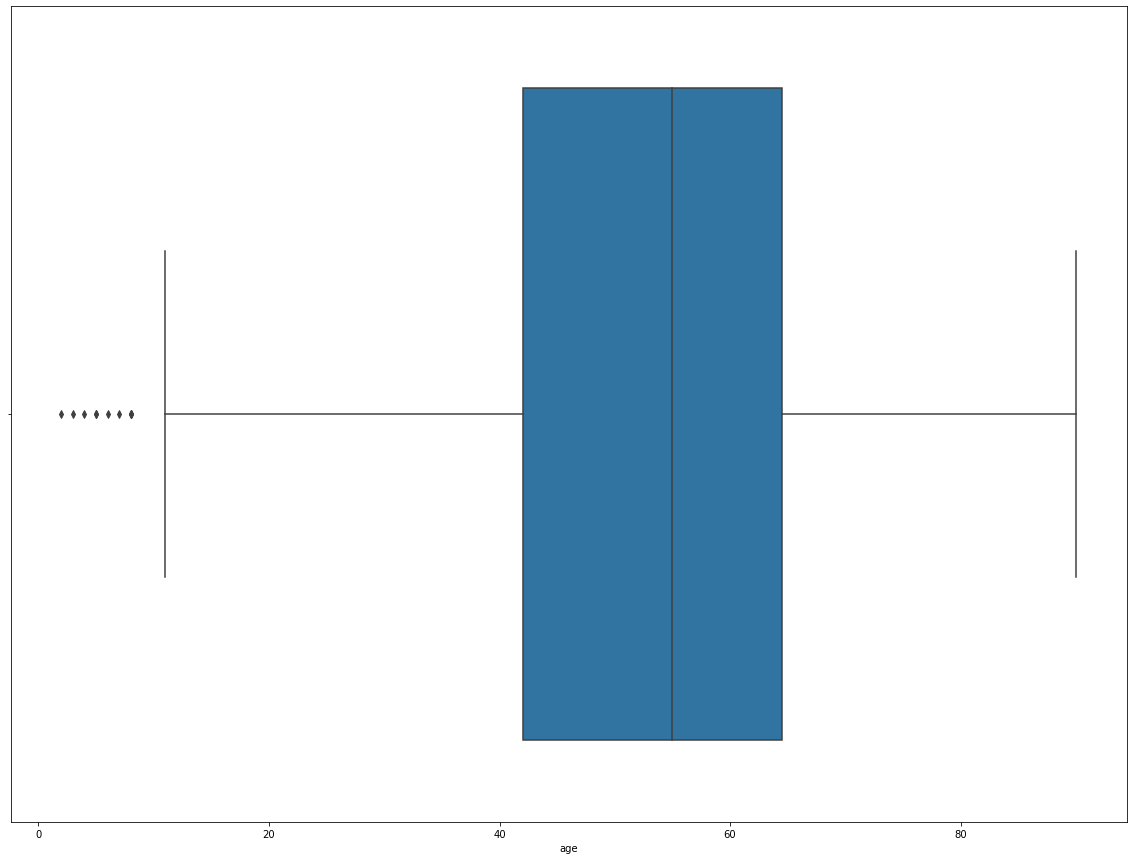

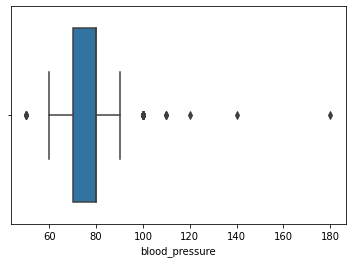

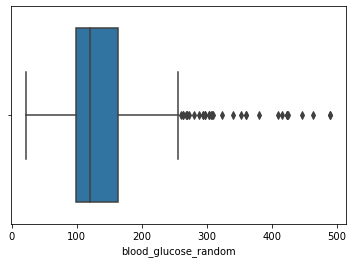

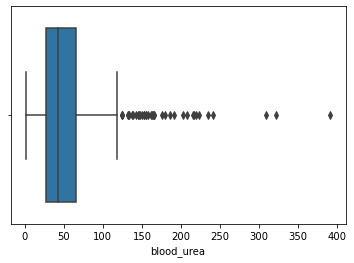

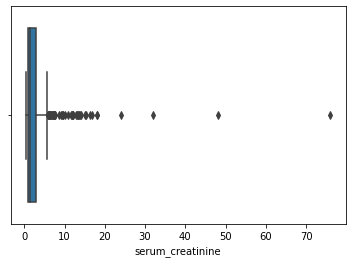

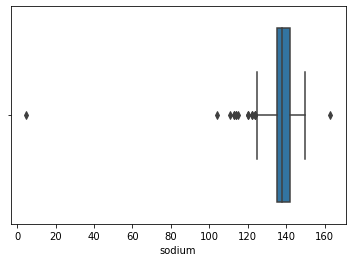

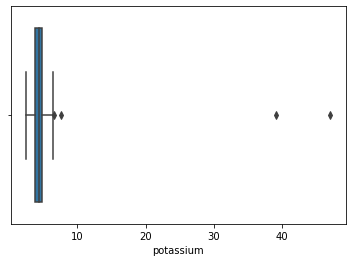

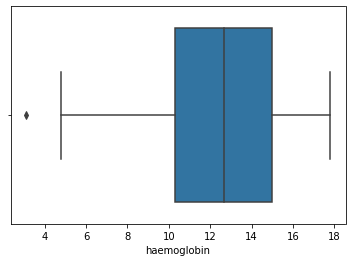

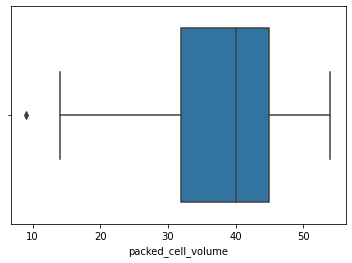

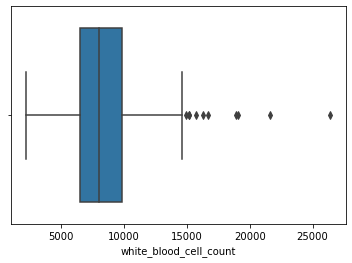

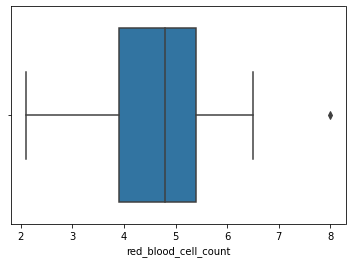

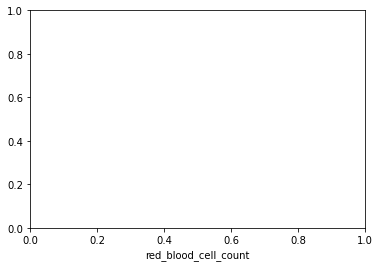

In [16]:
plt.figure(figsize=(20,15))
for col in not_Nominal_col:
    sns.boxplot(df[col])
    ax = plt.subplots()
    plt.xlabel(col)
plt.show
    


we can deduce that all numeric variables contain outliers
#### let's replace it with Maximum and Minimum Value :

In [17]:
new_df=df;
for col in not_Nominal_col:

    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    new_df[col] = np.where(new_df[col] >= upper, upper, new_df[col])
    new_df[col] = np.where(new_df[col] <= lower, lower, new_df[col])

print("New Shape: ", new_df.shape)


New Shape:  (400, 25)


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

<function matplotlib.pyplot.show(close=None, block=None)>

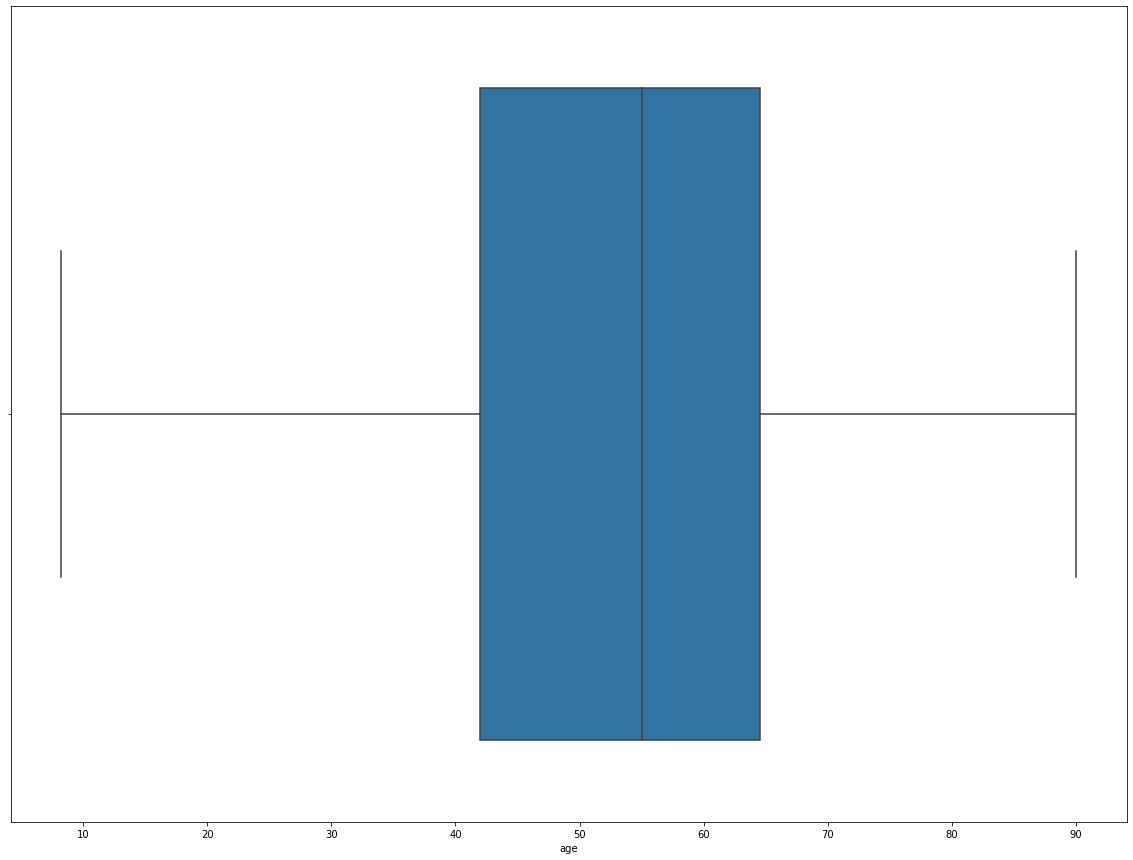

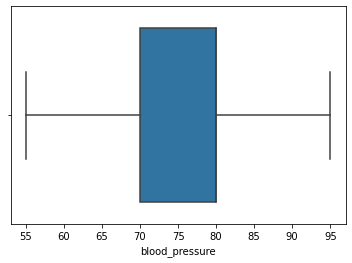

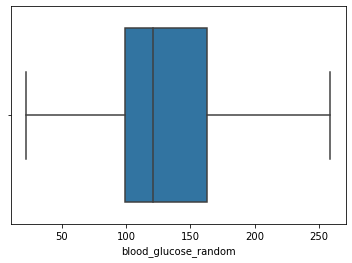

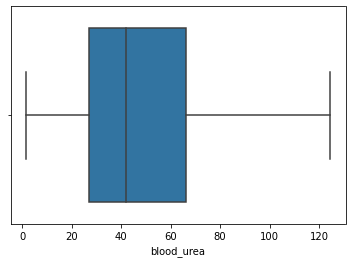

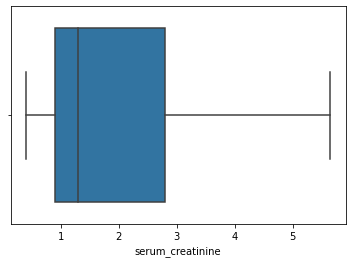

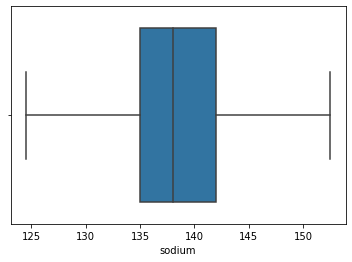

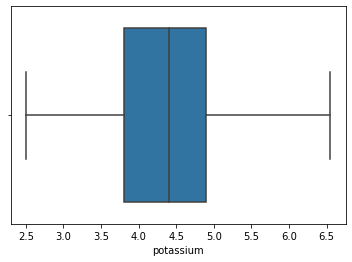

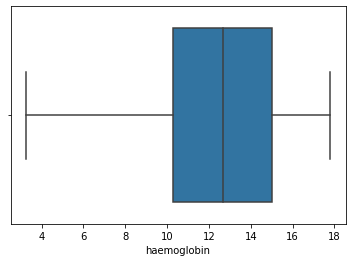

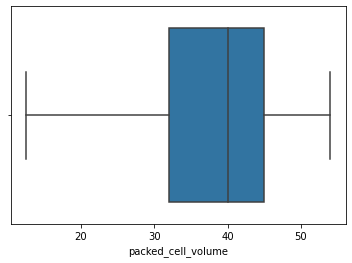

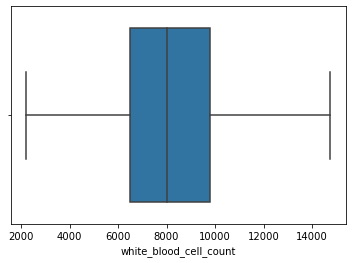

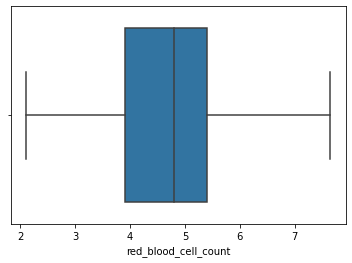

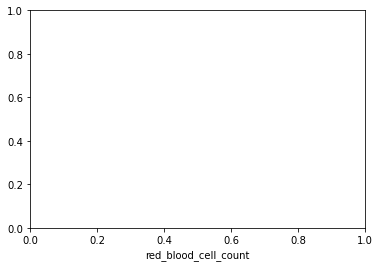

In [18]:
plt.figure(figsize=(20,15))
for col in not_Nominal_col:
    sns.boxplot(new_df[col])
    ax = plt.subplots()
    plt.xlabel(col)
plt.show

    

### Data Visualisation 

###### Visualisation of numeric variables :

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

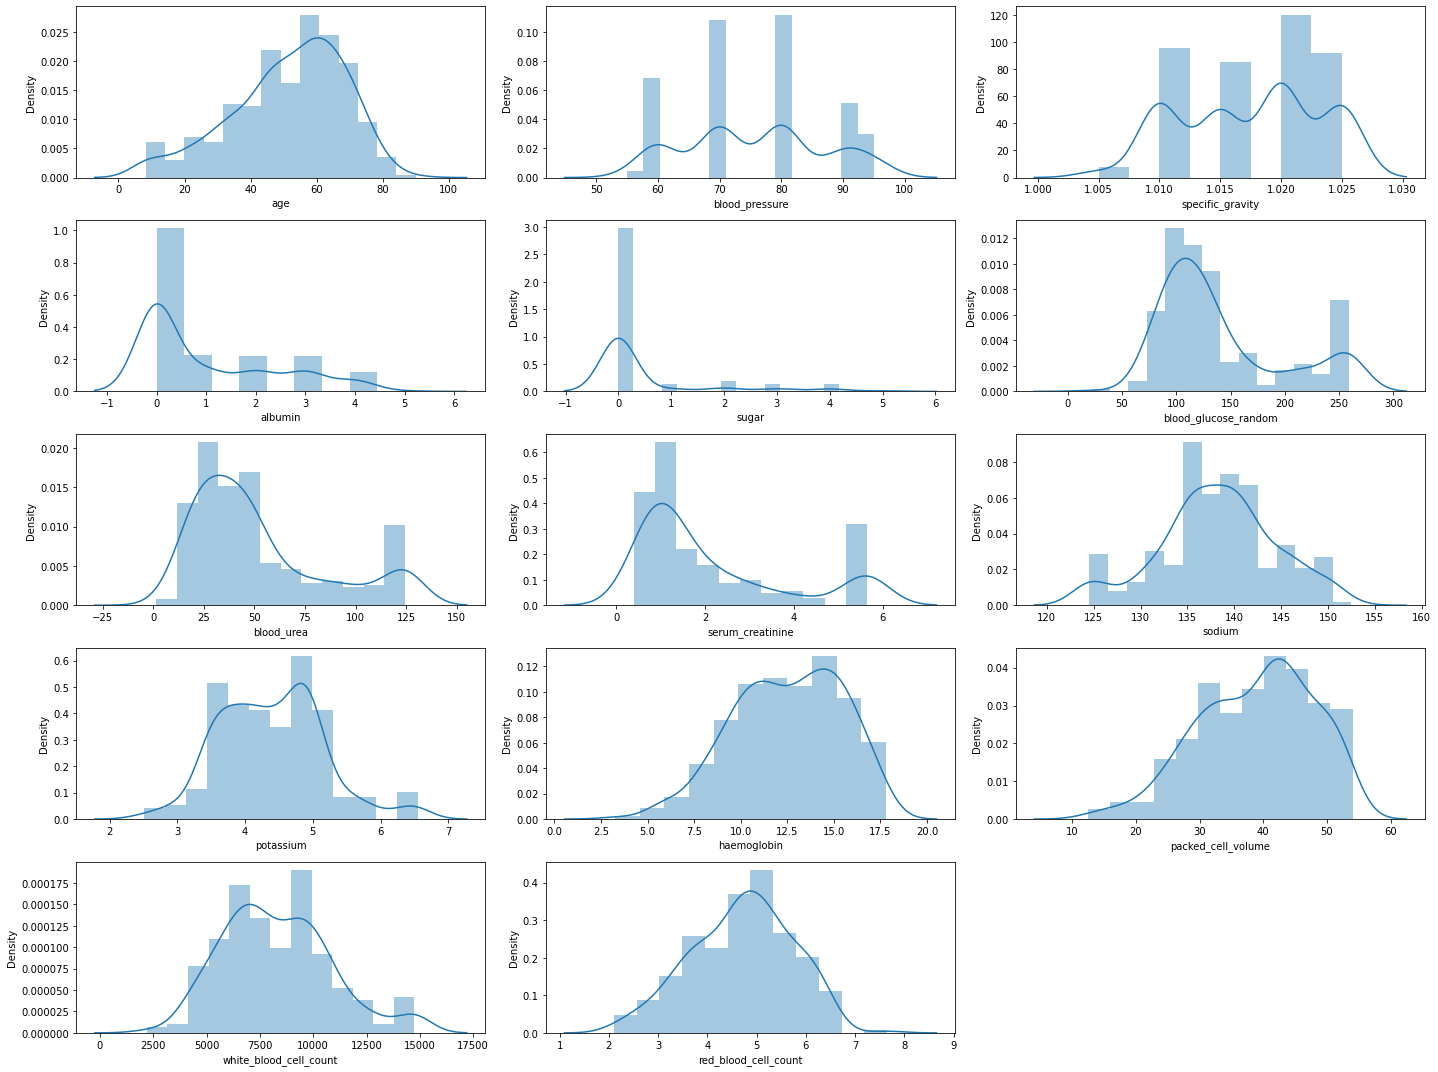

In [20]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1 
plt.tight_layout()
plt.show()   

almost all numeric variables having a distribution that resembles a Gaussian distribution

###### Visualisation of categorical variables :

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-p

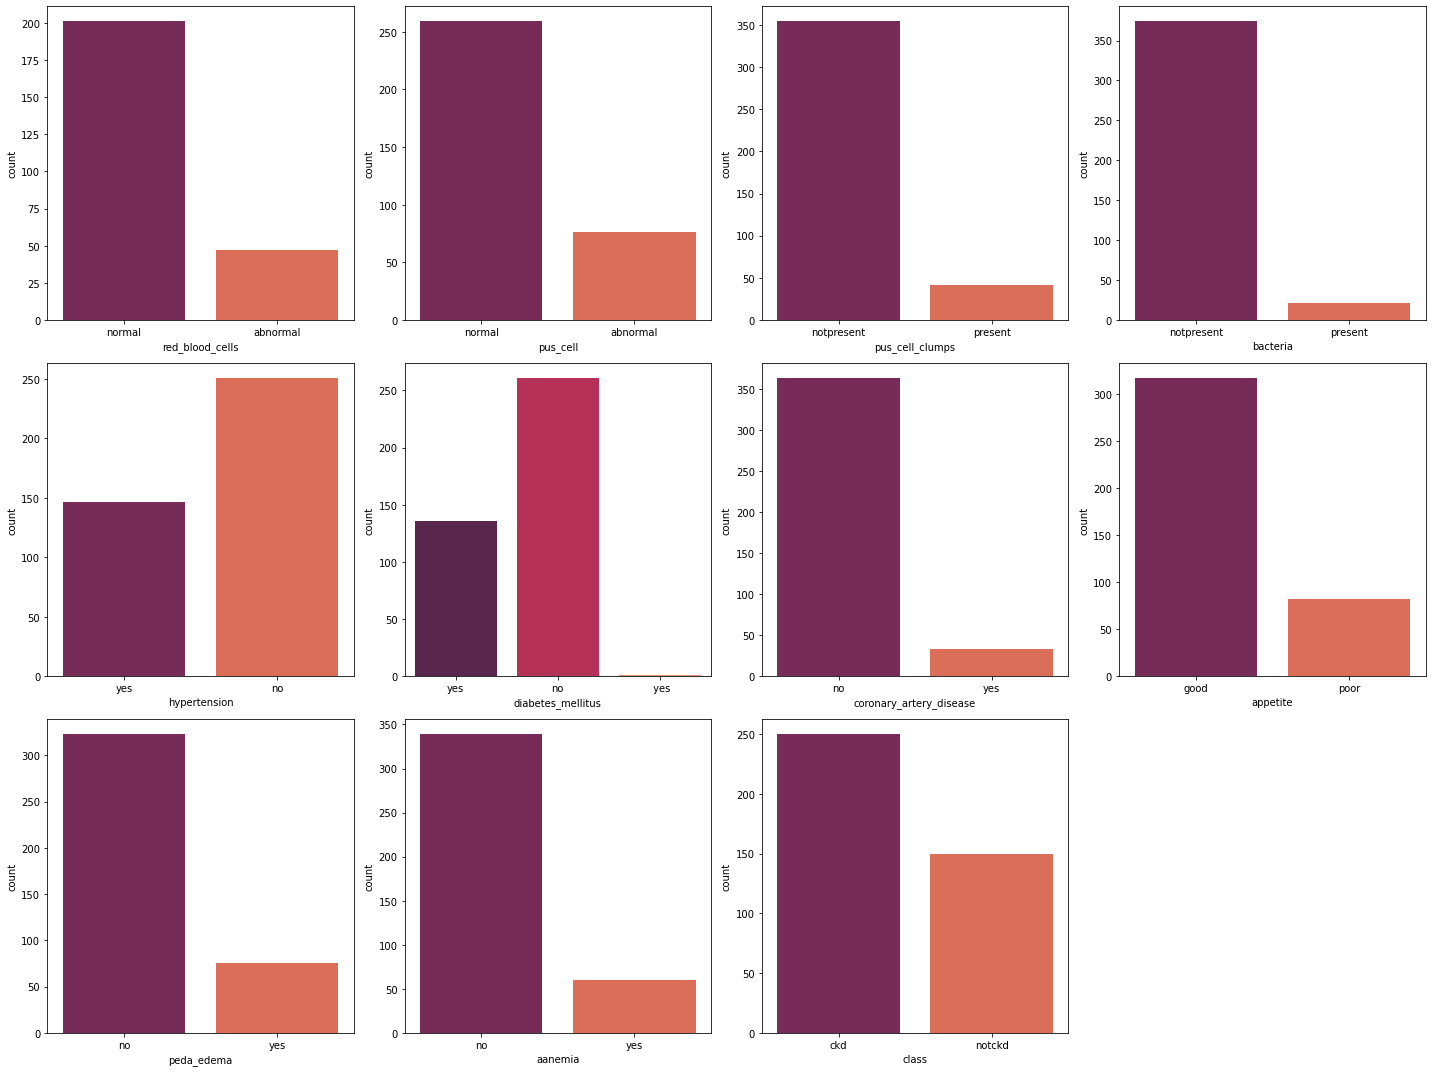

In [21]:

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_col:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

##### Encoding Target variable : 

In [22]:
df['class']=df['class'].replace(['ckd',"notckd"],[1,0])

##### correlation Matrix

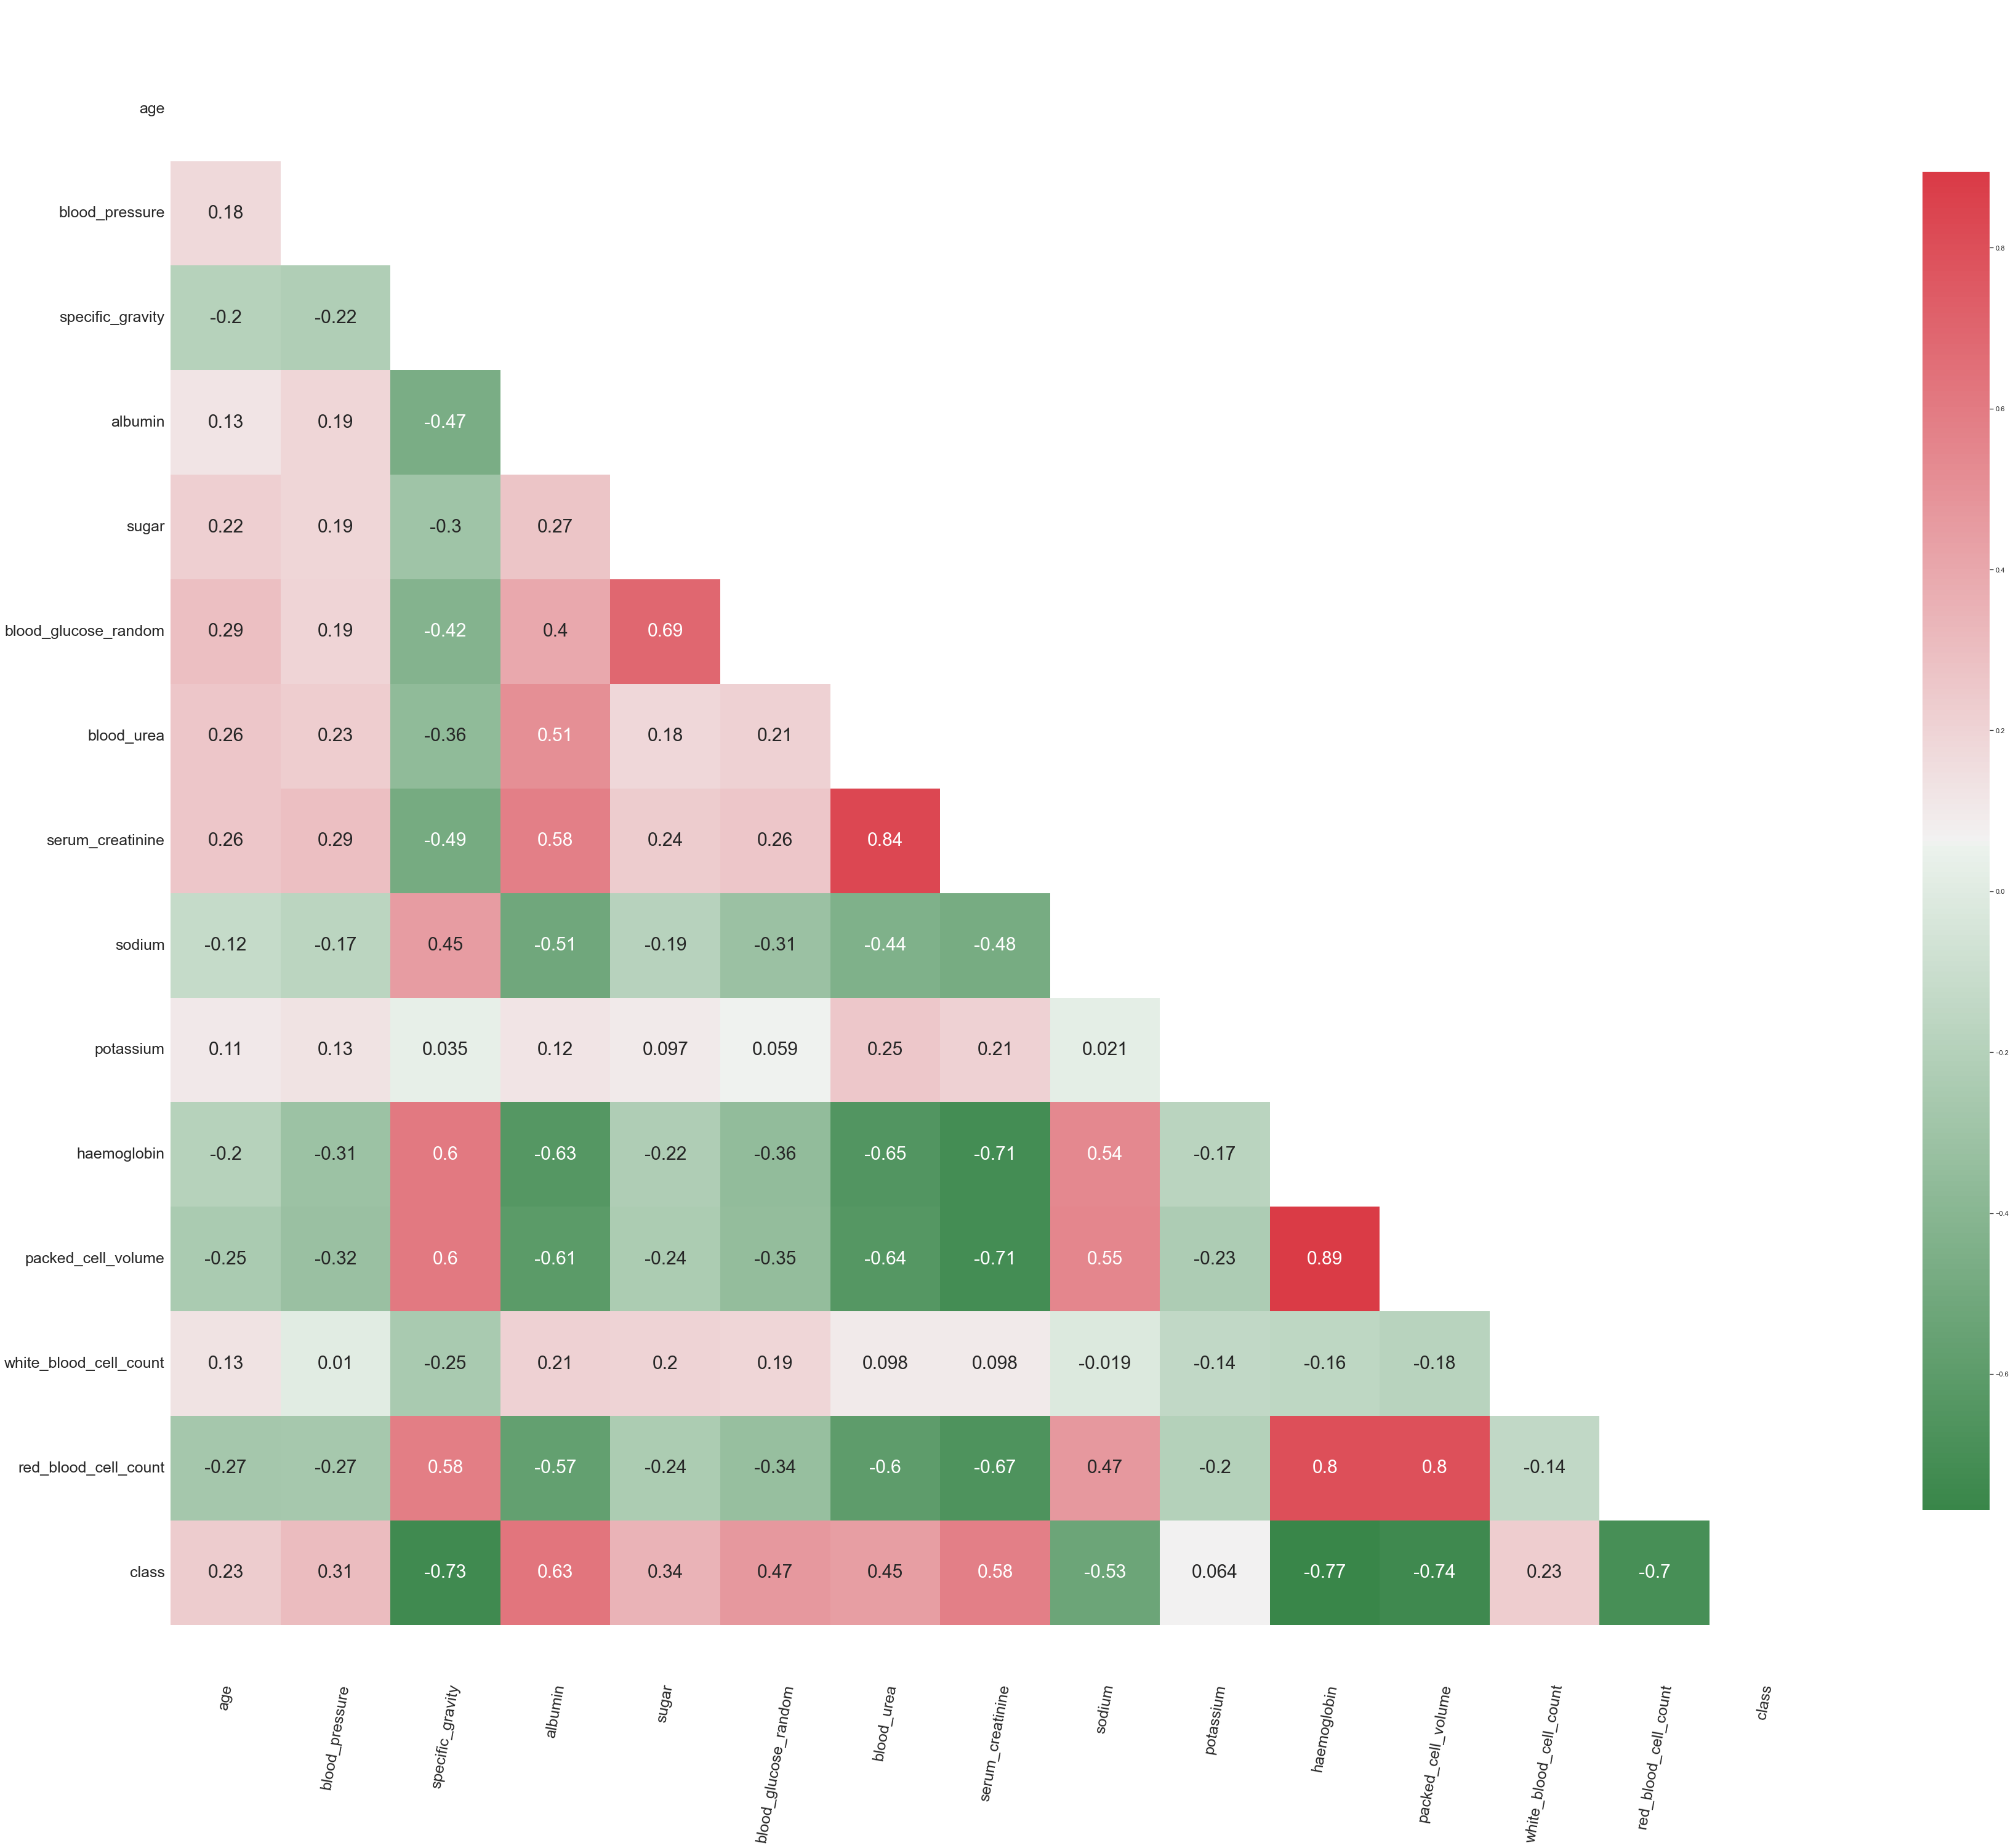

In [23]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = new_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":30},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

A strong correlation , between red_blood_cell_count and Homoglobine and packed_cell_volume and between serum_creatine and blood_urea
#### let's check correlation between numeric features and the target :

In [75]:
df_default_corrs = data.iloc[:-1,-1:]   # data = df.corr()  
df_default_corrs

,class
age,0.232818
blood_pressure,0.307337
specific_gravity,-0.732163
albumin,0.627090
sugar,0.344070
blood_glucose_random,0.465933
blood_urea,0.445190
serum_creatinine,0.576688
sodium,-0.533304
potassium,0.063940


<AxesSubplot:>

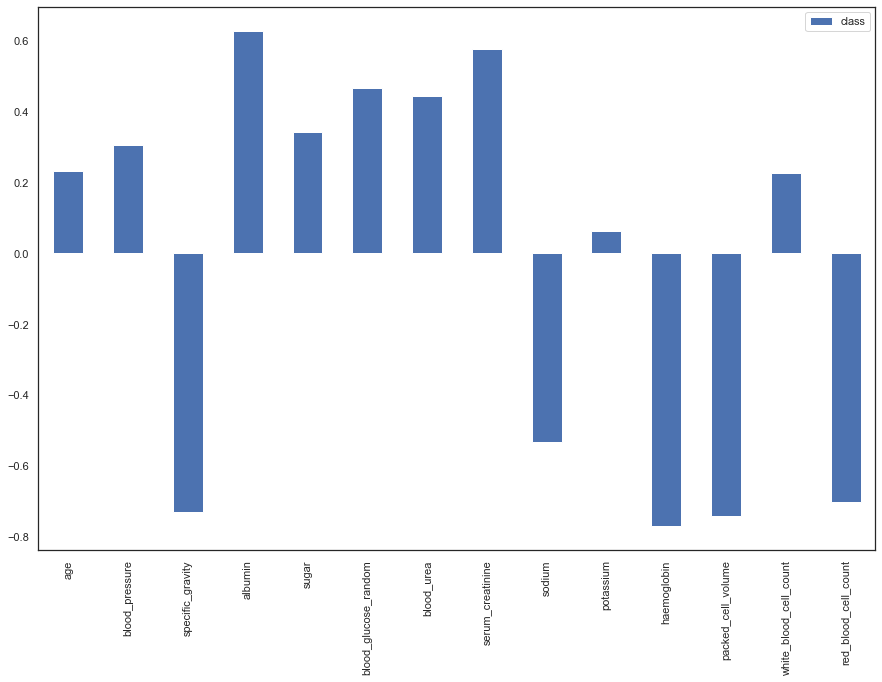

In [25]:
df_default_corrs.plot(kind='bar',figsize=(15,10))

between haemoglobin , packed_cell volume and red_blood_cell_count , hemoglobin had the biggest correlation with target value 
between blood_urea and serum_creatinine, serum_creatinine had the biggest correlation with target value 
So we decide to drop packed_cell volume , red_blood_cell_count and blood_urea

In [26]:
new_df=new_df.drop(columns=['packed_cell_volume'],axis=1)
new_df=new_df.drop(columns=['red_blood_cell_count'],axis=1)
new_df=new_df.drop(columns=['blood_urea'],axis=1)


#### extract columns : 

In [27]:
cat_col=[col for col in new_df.columns if new_df[col].dtype=="object"]
num_col=[col for col in new_df.columns if new_df[col].dtype!="object"]
Nominal_col=[col for col in new_df.columns if (df[col].dtype=="object" or col=='albumin' or col=='specific_gravity' or col=="sugar" )]
not_Nominal_col=[col for col in new_df.columns if (df[col].dtype!="object" and col!='albumin' and col!='specific_gravity' and col!="sugar" )]
cat_col1=[col for col in df.columns if df[col].dtype=="object"]
num_col1=[col for col in df.columns if df[col].dtype!="object"]
Nominal_col1=[col for col in df.columns if (df[col].dtype=="object" or col=='albumin' or col=='specific_gravity' or col=="sugar" )]
not_Nominal_col1=[col for col in df.columns if (df[col].dtype!="object" and col!='albumin' and col!='specific_gravity' and col!="sugar" )]


 ##### Relation Target/Age 

<AxesSubplot:xlabel='age', ylabel='count'>

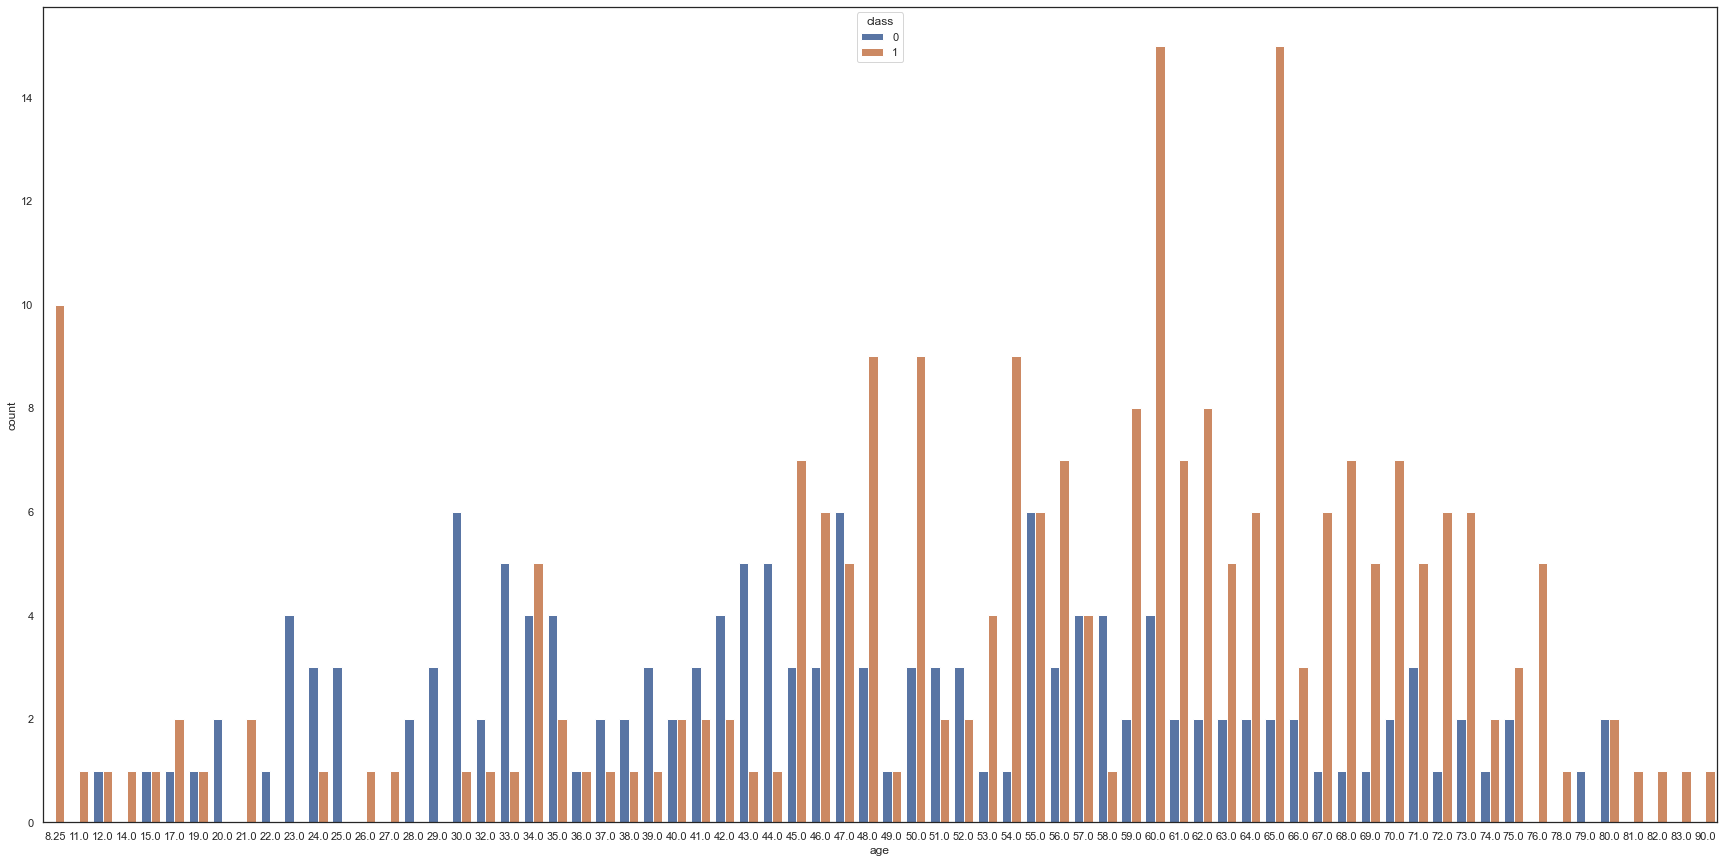

In [28]:
plt.figure(figsize=(30,15))

sns.countplot(x='age',hue='class',data=new_df)

the chances of having chronic kidney disease are almost the same when the age is less than 59 but we can conclude that people aged over 59 have a greater chance of having chronic kidney disease

 ##### Relation Target/Sugar

<AxesSubplot:xlabel='sugar', ylabel='count'>

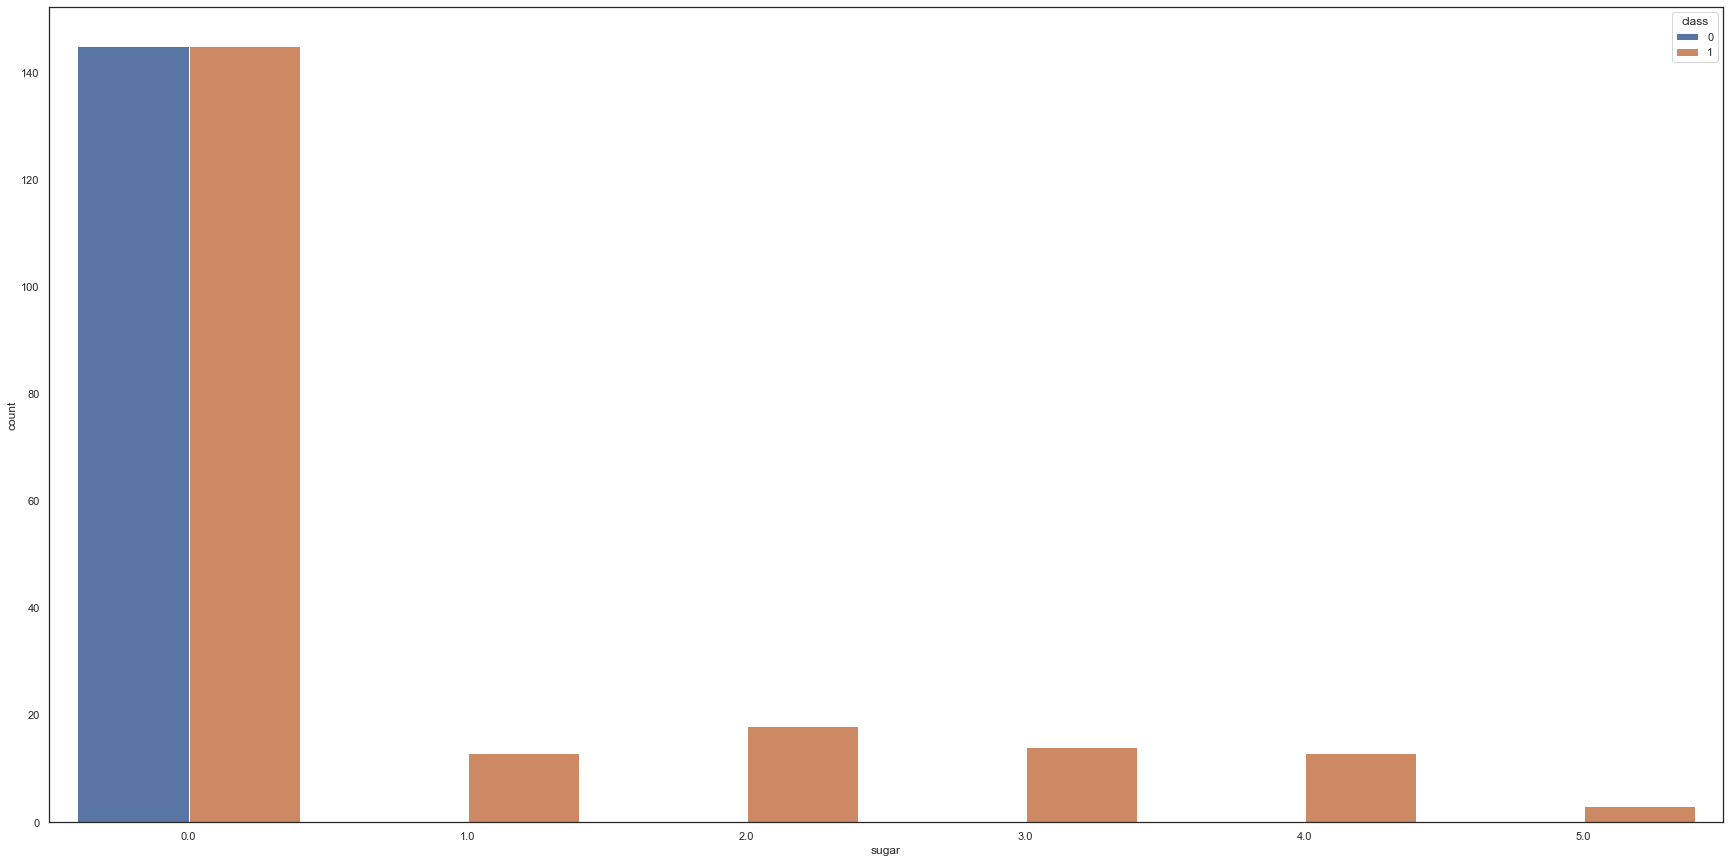

In [29]:
plt.figure(figsize=(30,15))

sns.countplot(x='sugar',hue='class',data=new_df)

We can draw a very important remark, People who have a high insulin level have a very very high chance of having chronic kidney disease .We can conclude that diabetes is the most risky

#### Splitting data to dataset of person who have "Ckd" and who does'nt have "Ckd" :

In [31]:
data_detected=new_df[new_df['class']==1]
data_notdetected=new_df[new_df['class']==0]

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

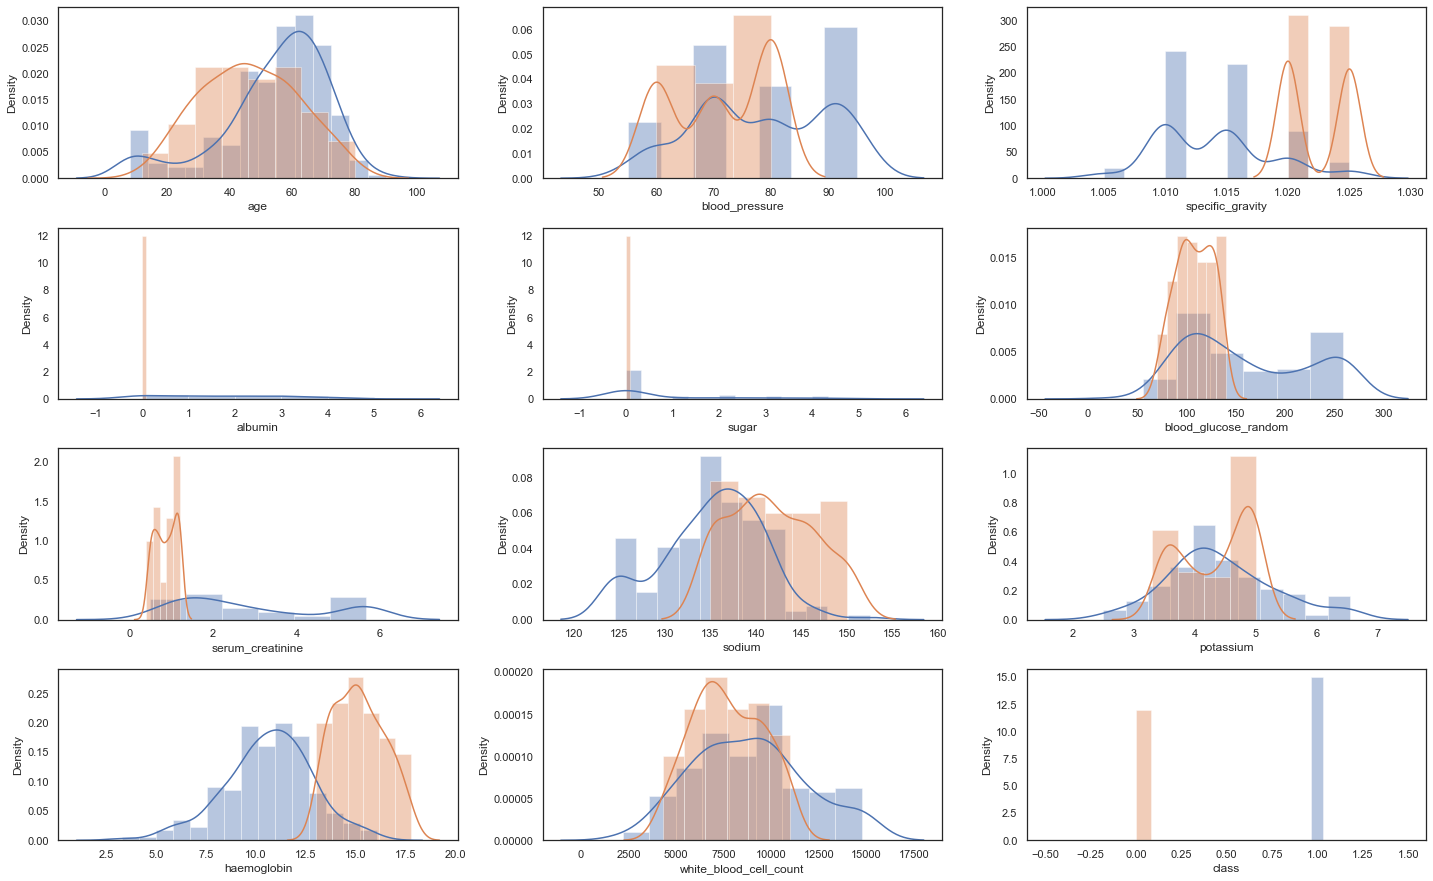

In [32]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in num_col:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data_detected[column],label='detected')
        sns.distplot(data_notdetected[column],label='not_detected')

        plt.xlabel(column)
        
    plotnumber += 1 
plt.tight_layout()
plt.show()   

while separating the analysis of people who have chronic disease and who don't, it can be seen that people who drew chronic kidney disease had very high insulin level, albimun level, potassium level and serum cretinin.

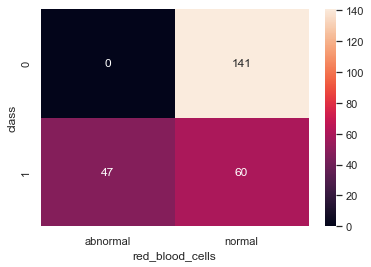

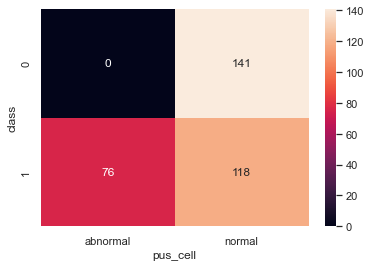

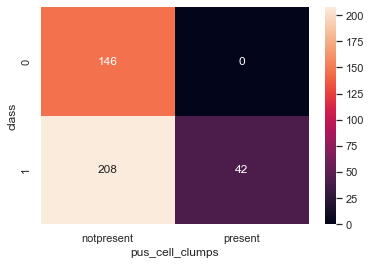

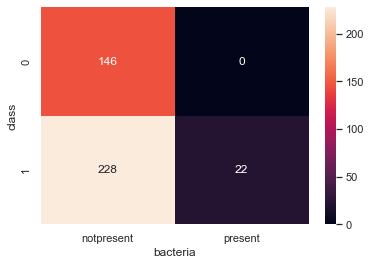

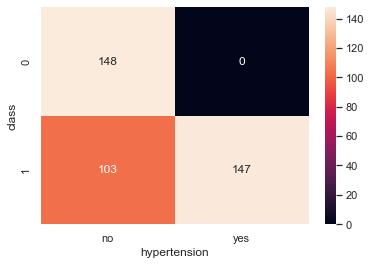

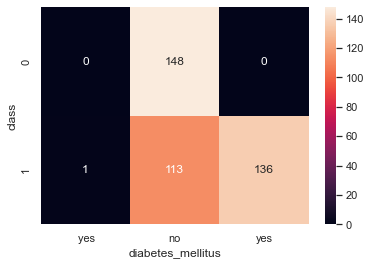

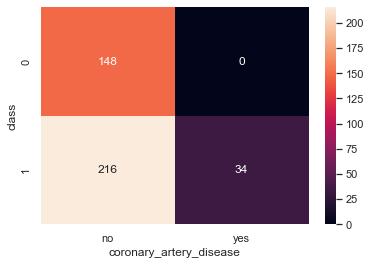

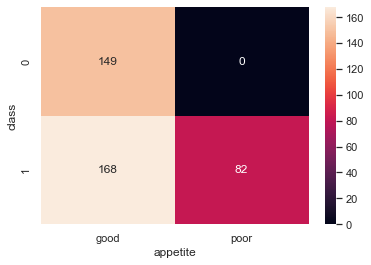

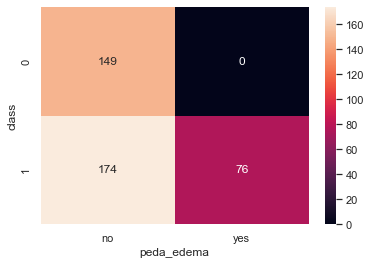

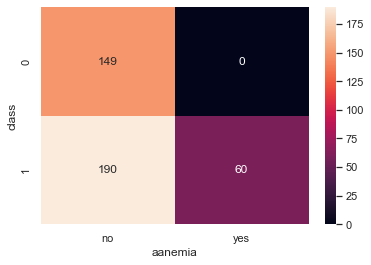

In [34]:
for col in cat_col :
    plt.figure()
    sns.heatmap(pd.crosstab(new_df['class'],new_df[col]),annot=True , fmt='d')

###### -it can be drawn that all observations of diabetes , and the persons who have hypertention have a chronic kidney disease
###### -usually people with poor appetite have high risk of chronic kidney disease
###### -usually people with abnormal pus_cells have high risk of chronic kidney disease

### Data Preprocessing

-Searching Most Frequent Value of Categorical Variable :

In [35]:
for col in cat_col:
    print(f" {col} most frequent value is {new_df[col].mode()}\n")

 red_blood_cells most frequent value is 0    normal
dtype: object

 pus_cell most frequent value is 0    normal
dtype: object

 pus_cell_clumps most frequent value is 0    notpresent
dtype: object

 bacteria most frequent value is 0    notpresent
dtype: object

 hypertension most frequent value is 0    no
dtype: object

 diabetes_mellitus most frequent value is 0    no
dtype: object

 coronary_artery_disease most frequent value is 0    no
dtype: object

 appetite most frequent value is 0    good
dtype: object

 peda_edema most frequent value is 0    no
dtype: object

 aanemia most frequent value is 0    no
dtype: object



Replacing the nan values of Categorical variables by the most frequent : 

In [36]:

new_df['albumin'].fillna(0,inplace=True)
new_df['sugar'].fillna(0,inplace=True)
new_df['specific_gravity'].fillna(1.02,inplace=True)
new_df['red_blood_cells'].fillna('normal',inplace=True)
new_df['aanemia'].fillna('no',inplace=True)
new_df['peda_edema'].fillna('no',inplace=True)
new_df["coronary_artery_disease"].fillna('no',inplace=True)
new_df['diabetes_mellitus'].fillna('no',inplace=True)
new_df['pus_cell_clumps'].fillna('notpresent',inplace=True)
new_df["coronary_artery_disease"].fillna('no',inplace=True)
new_df["hypertension"].fillna("no",inplace=True) 
new_df["appetite"].fillna("good",inplace=True)
new_df["pus_cell"].fillna("normal",inplace=True)
new_df["bacteria"].fillna("notpresent",inplace=True)

Replacing the nan values of numerical variables by the median(features have gaussian distribution) 

In [37]:
for col in not_Nominal_col:
    new_df[col]=new_df[col].fillna(new_df[col].mean())

### Encoding Categorical features 

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
for col in cat_col:
    new_df[col]=le.fit_transform(new_df[col])

In [39]:
for col in cat_col1:
    df[col]=le.fit_transform(df[col])

In [40]:
new_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,potassium,haemoglobin,white_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.00,80.0,1.020,1.0,0.0,1,1,0,0,121.00000,...,4.390064,15.4,7800.0,1,2,0,0,0,0,1
1,8.25,55.0,1.020,4.0,0.0,1,1,0,0,139.97191,...,4.390064,11.3,6000.0,0,1,0,0,0,0,1
2,62.00,80.0,1.010,2.0,3.0,1,1,0,0,259.00000,...,4.390064,9.6,7500.0,0,2,0,1,0,1,1
3,48.00,70.0,1.005,4.0,0.0,1,0,1,0,117.00000,...,2.500000,11.2,6700.0,1,1,0,1,1,1,1
4,51.00,80.0,1.010,2.0,0.0,1,1,0,0,106.00000,...,4.390064,11.6,7300.0,0,1,0,0,0,0,1


In [41]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.00,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,1
1,8.25,55.0,1.020,4.0,0.0,2,1,0,0,NaN,...,38.0,6000.0,NaN,0,1,0,0,0,0,1
2,62.00,80.0,1.010,2.0,3.0,1,1,0,0,259.0,...,31.0,7500.0,NaN,0,2,0,1,0,1,1
3,48.00,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,1
4,51.00,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,1


In [77]:
df['albumin'].fillna(0,inplace=True)
df['sugar'].fillna(0,inplace=True)
df['specific_gravity'].fillna(1.02,inplace=True)
df['red_blood_cells'].fillna('normal',inplace=True)
df['aanemia'].fillna('no',inplace=True)
df['peda_edema'].fillna('no',inplace=True)
df["coronary_artery_disease"].fillna('no',inplace=True)
df['diabetes_mellitus'].fillna('no',inplace=True)
df['pus_cell_clumps'].fillna('notpresent',inplace=True)
df["coronary_artery_disease"].fillna('no',inplace=True)
df["hypertension"].fillna("no",inplace=True) 
df["appetite"].fillna("good",inplace=True)
df["pus_cell"].fillna("normal",inplace=True)
df["bacteria"].fillna("notpresent",inplace=True)
for col in not_Nominal_col1:
    df[col]=df[col].fillna(df[col].mean())

### function to evaluate model 

In [90]:
#Model Evaluation function 
def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report,auc

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    #print('confusion matrix-train\n',confusion_matrix(ytrain,y_pred))
    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]


    #print('confusion matrix-test\n',confusion_matrix(ytest,y_test_pred))
    print('Overall Test Accuracy',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))
    
    
    kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
    score=[]
    for train_idx,test_idx in kf.split(Xtrain,ytrain):
        xtrain_k,xtest_k = Xtrain.iloc[train_idx,:],Xtrain.iloc[test_idx,:]
        ytrain_k,ytest_k = ytrain.iloc[train_idx],ytrain.iloc[test_idx]
        algo.fit(xtrain_k,ytrain_k)
        y_pred_k = algo.predict(xtest_k)
        roc = roc_auc_score(ytest_k,y_pred_k)
        score.append(roc)
    print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))
    
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['positive', 'negative'], 
            yticklabels = ['positive', 'negative'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    roc_auc2 = auc(fpr, tpr)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC curve (area = %0.2f)'% roc_auc2)
    plt.show()

# Initial modeling : 


### SVM Model :

In [107]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['class'], axis=1)
y = df['class']
X_initial_train, X_initial_test, y_initial_train, y_initial_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [114]:
#Import svm model
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Create a svm Classifier
clf_rfe = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_rfe.fit(X_initial_train, y_initial_train)

#Predict the response for test dataset
y_pred = clf_rfe.predict(X_initial_test)

# accuracy score, confusion matrix and classification report of SVM

clf_acc_ref = accuracy_score(y_initial_test, clf_rfe.predict(X_initial_test))

print(f"Training Accuracy of SVM Classifier is {accuracy_score(y_initial_train, clf_rfe.predict(X_initial_train))}")
print(f"Test Accuracy of SVM is {clf_acc_ref} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_initial_test, clf_rfe.predict(X_initial_test))}\n")
print(f"Classification Report :- \n {classification_report(y_initial_test, clf_rfe.predict(X_initial_test))}")


Training Accuracy of SVM Classifier is 0.9833333333333333
Test Accuracy of SVM is 0.98125 

Confusion Matrix :- 
[[58  0]
 [ 3 99]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.97      0.99       102

    accuracy                           0.98       160
   macro avg       0.98      0.99      0.98       160
weighted avg       0.98      0.98      0.98       160



### KNN Model :

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#Train the model using the training sets
knn.fit(X_initial_train, y_initial_train)

#Predict the response for test dataset
y_pred = knn.predict(X_initial_test)

# accuracy score, confusion matrix and classification report of SVM

knn_acc_ref = accuracy_score(y_initial_test, knn.predict(X_initial_test))

print(f"Training Accuracy of KNN Classifier is {accuracy_score(y_initial_train, knn.predict(X_initial_train))}")
print(f"Test Accuracy of KNN Classifier is {clf_acc_ref} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_initial_test, knn.predict(X_initial_test))}\n")
print(f"Classification Report :- \n {classification_report(y_initial_test, knn.predict(X_initial_test))}")


Training Accuracy of KNN Classifier is 0.7833333333333333
Test Accuracy of KNN Classifier is 0.98125 

Confusion Matrix :- 
[[50  8]
 [34 68]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.60      0.86      0.70        58
           1       0.89      0.67      0.76       102

    accuracy                           0.74       160
   macro avg       0.74      0.76      0.73       160
weighted avg       0.79      0.74      0.74       160



### Decision Tree:

In [115]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_initial_train, y_initial_train)
y_pred = dtc.predict(X_initial_test)
dtc_acc_ref = accuracy_score(y_initial_test, dtc.predict(X_initial_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_initial_train, dtc.predict(X_initial_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {clf_acc_ref} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_initial_test, dtc.predict(X_initial_test))}\n")
print(f"Classification Report :- \n {classification_report(y_initial_test, dtc.predict(X_initial_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.98125 

Confusion Matrix :- 
[[58  0]
 [ 8 94]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        58
           1       1.00      0.92      0.96       102

    accuracy                           0.95       160
   macro avg       0.94      0.96      0.95       160
weighted avg       0.96      0.95      0.95       160



### Random Forest:

In [116]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_initial_train, y_initial_train)
y_pred = rd_clf.predict(X_initial_test)
rd_acc_ref = accuracy_score(y_initial_test, rd_clf.predict(X_initial_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_initial_train, rd_clf.predict(X_initial_train))}")
print(f"Test Accuracy of Random Forest Classifier is {clf_acc_ref} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_initial_test, rd_clf.predict(X_initial_test))}\n")
print(f"Classification Report :- \n {classification_report(y_initial_test, rd_clf.predict(X_initial_test))}")


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.98125 

Confusion Matrix :- 
[[ 58   0]
 [  0 102]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       102

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



### Conclusion : 
all models have results that are not bad, but they can be improved

### Problem of unbalanced DataSet : 

In [117]:
df['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

##### we have to balance the database because it will influence the learning in a negative way 
   - 250 "ckd" , 150 "not ckd" , So we resolve this problem by generating observations of the minority class 


In [120]:
from sklearn.utils import resample
df_majority = new_df[new_df['class'] == 1]
df_minority = new_df[new_df['class'] == 0]
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples = len(df_majority),    # to match majority class
                                 random_state= 42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled['class'].value_counts()

1    250
0    250
Name: class, dtype: int64

In [121]:
df_upsampled.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,potassium,haemoglobin,white_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.00,80.0,1.020,1.0,0.0,1,1,0,0,121.00000,...,4.390064,15.4,7800.0,1,2,0,0,0,0,1
1,8.25,55.0,1.020,4.0,0.0,1,1,0,0,139.97191,...,4.390064,11.3,6000.0,0,1,0,0,0,0,1
2,62.00,80.0,1.010,2.0,3.0,1,1,0,0,259.00000,...,4.390064,9.6,7500.0,0,2,0,1,0,1,1
3,48.00,70.0,1.005,4.0,0.0,1,0,1,0,117.00000,...,2.500000,11.2,6700.0,1,1,0,1,1,1,1
4,51.00,80.0,1.010,2.0,0.0,1,1,0,0,106.00000,...,4.390064,11.6,7300.0,0,1,0,0,0,0,1


### Normalising DataSet :

In [118]:
def min_max_scaling(df):
#     # copy the dataframe
     df_norm = df.copy()
#     # apply min-max scaling
     for column in df_norm.columns:
         df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
            
     return df_norm

In [119]:
df_normalized = min_max_scaling(new_df)
df_normalized.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,potassium,haemoglobin,white_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0.486239,0.625,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.417722,...,0.466682,0.835052,0.446215,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0.497772,...,0.466682,0.553265,0.302789,0.0,0.5,0.0,0.0,0.0,0.0,1.0
2,0.657492,0.625,0.25,0.4,0.6,1.0,1.0,0.0,0.0,1.000000,...,0.466682,0.436426,0.422311,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,0.486239,0.375,0.00,0.8,0.0,1.0,0.0,1.0,0.0,0.400844,...,0.000000,0.546392,0.358566,1.0,0.5,0.0,1.0,1.0,1.0,1.0
4,0.522936,0.625,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.354430,...,0.466682,0.573883,0.406375,0.0,0.5,0.0,0.0,0.0,0.0,1.0


# Feature Selection 

### Feature Selection KBest :

In [142]:
#Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = new_df.drop(columns=['class'], axis=1)
y = new_df['class']
# # Feature extraction
test = SelectKBest(score_func=chi2, k=4)
## chi2: Chi-squared stats of non-negative features for classification tasks.
fit = test.fit(X, y)
i=0
dict={}
for col in X.columns:
        np.set_printoptions(precision=3)
        dict[col]=fit.scores_[i]
        i=i+1
sorted_dict = {}
sorted_keys = sorted(dict, key=dict.get)  

for w in sorted_keys:
    sorted_dict[w] = dict[w]

print(sorted_dict.values()) 

Feature_importance = pd.DataFrame({'feature_importance': sorted_dict.values(), 'feature_names': sorted_dict.keys()})
Feature_importance.head(21)

dict_values([0.005035316129718223, 0.13884186380573246, 3.7546742209631727, 10.696296296296296, 13.2, 20.144119691776424, 20.4, 20.439252336448597, 25.2, 36.0, 45.6, 49.2, 58.25920074134143, 88.2, 94.8, 116.42696209915286, 125.05687493208228, 167.6811853267739, 216.0, 1643.4778318216013, 9152.38639046704])


,feature_importance,feature_names
0,0.005035,specific_gravity
1,0.138842,potassium
2,3.754674,red_blood_cells
3,10.696296,pus_cell
4,13.200000,bacteria
5,20.144120,sodium
6,20.400000,coronary_artery_disease
7,20.439252,diabetes_mellitus
8,25.200000,pus_cell_clumps
9,36.000000,aanemia


This test tells us that    white_blood_cell_count , blood_glucose_random , albumin , serum_creatinine , haemoglobin , age , sugar, hypertension , blood_pressure , appetite , peda_edema are the most important variables for the training set

## RFE with SVM :

In [155]:
from sklearn.feature_selection import RFE ,RFECV
from sklearn.linear_model import SGDClassifier 
clf = svm.SVC(kernel='linear') 
selector=RFECV(clf,step=1,min_features_to_select=10)
selector.fit(X,Y)
dict={}
i=0
for col in new_df.columns:
    if(col!='class'):
        dict[col]=selector.ranking_[i]
        i=i+1
sorted_dict = {}
sorted_keys = sorted(dict, key=dict.get)  
for w in sorted_keys:
    sorted_dict[w] = dict[w]
Feature_importance = pd.DataFrame({'feature_importance': sorted_dict.values(), 'feature_names': sorted_dict.keys()})
Feature_importance.head(21)

,feature_importance,feature_names
0,1,age
1,1,blood_pressure
2,1,specific_gravity
3,1,albumin
4,1,sugar
5,1,red_blood_cells
6,1,serum_creatinine
7,1,sodium
8,1,potassium
9,1,haemoglobin


### RFE with SGDClassifier:

In [154]:
from sklearn.feature_selection import RFE ,RFECV
from sklearn.linear_model import SGDClassifier 
selector=RFECV(SGDClassifier(),step=1,min_features_to_select=10)
selector.fit(X,Y)
dict={}
i=0
for col in new_df.columns:
    if(col!='class'):
        dict[col]=selector.ranking_[i]
        i=i+1
sorted_dict = {}
sorted_keys = sorted(dict, key=dict.get)  
for w in sorted_keys:
    sorted_dict[w] = dict[w]
Feature_importance = pd.DataFrame({'feature_importance': sorted_dict.values(), 'feature_names': sorted_dict.keys()})
Feature_importance.head(21)

,feature_importance,feature_names
0,1,blood_pressure
1,1,albumin
2,1,sugar
3,1,pus_cell
4,1,serum_creatinine
5,1,haemoglobin
6,1,hypertension
7,1,diabetes_mellitus
8,1,appetite
9,1,peda_edema


### Conclusion : 
Bacteria, anemia, coronary_artery_disease,sodium,peda_edema ,appetite have no influence on the result after the 3 tests 


In [156]:
new_df=new_df.drop(columns=['bacteria'],axis=1)
new_df=new_df.drop(columns=['coronary_artery_disease'],axis=1)
new_df=new_df.drop(columns=['sodium'],axis=1)
new_df=new_df.drop(columns=['aanemia'],axis=1)
new_df=new_df.drop(columns=['peda_edema'],axis=1)

In [161]:
new_df=new_df.drop(columns=['appetite'],axis=1)

In [157]:
new_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,blood_glucose_random,serum_creatinine,potassium,haemoglobin,white_blood_cell_count,hypertension,diabetes_mellitus,appetite,class
0,48.00,80.0,1.020,1.0,0.0,1,1,0,121.00000,1.2,4.390064,15.4,7800.0,1,2,0,1
1,8.25,55.0,1.020,4.0,0.0,1,1,0,139.97191,0.8,4.390064,11.3,6000.0,0,1,0,1
2,62.00,80.0,1.010,2.0,3.0,1,1,0,259.00000,1.8,4.390064,9.6,7500.0,0,2,1,1
3,48.00,70.0,1.005,4.0,0.0,1,0,1,117.00000,3.8,2.500000,11.2,6700.0,1,1,1,1
4,51.00,80.0,1.010,2.0,0.0,1,1,0,106.00000,1.4,4.390064,11.6,7300.0,0,1,0,1


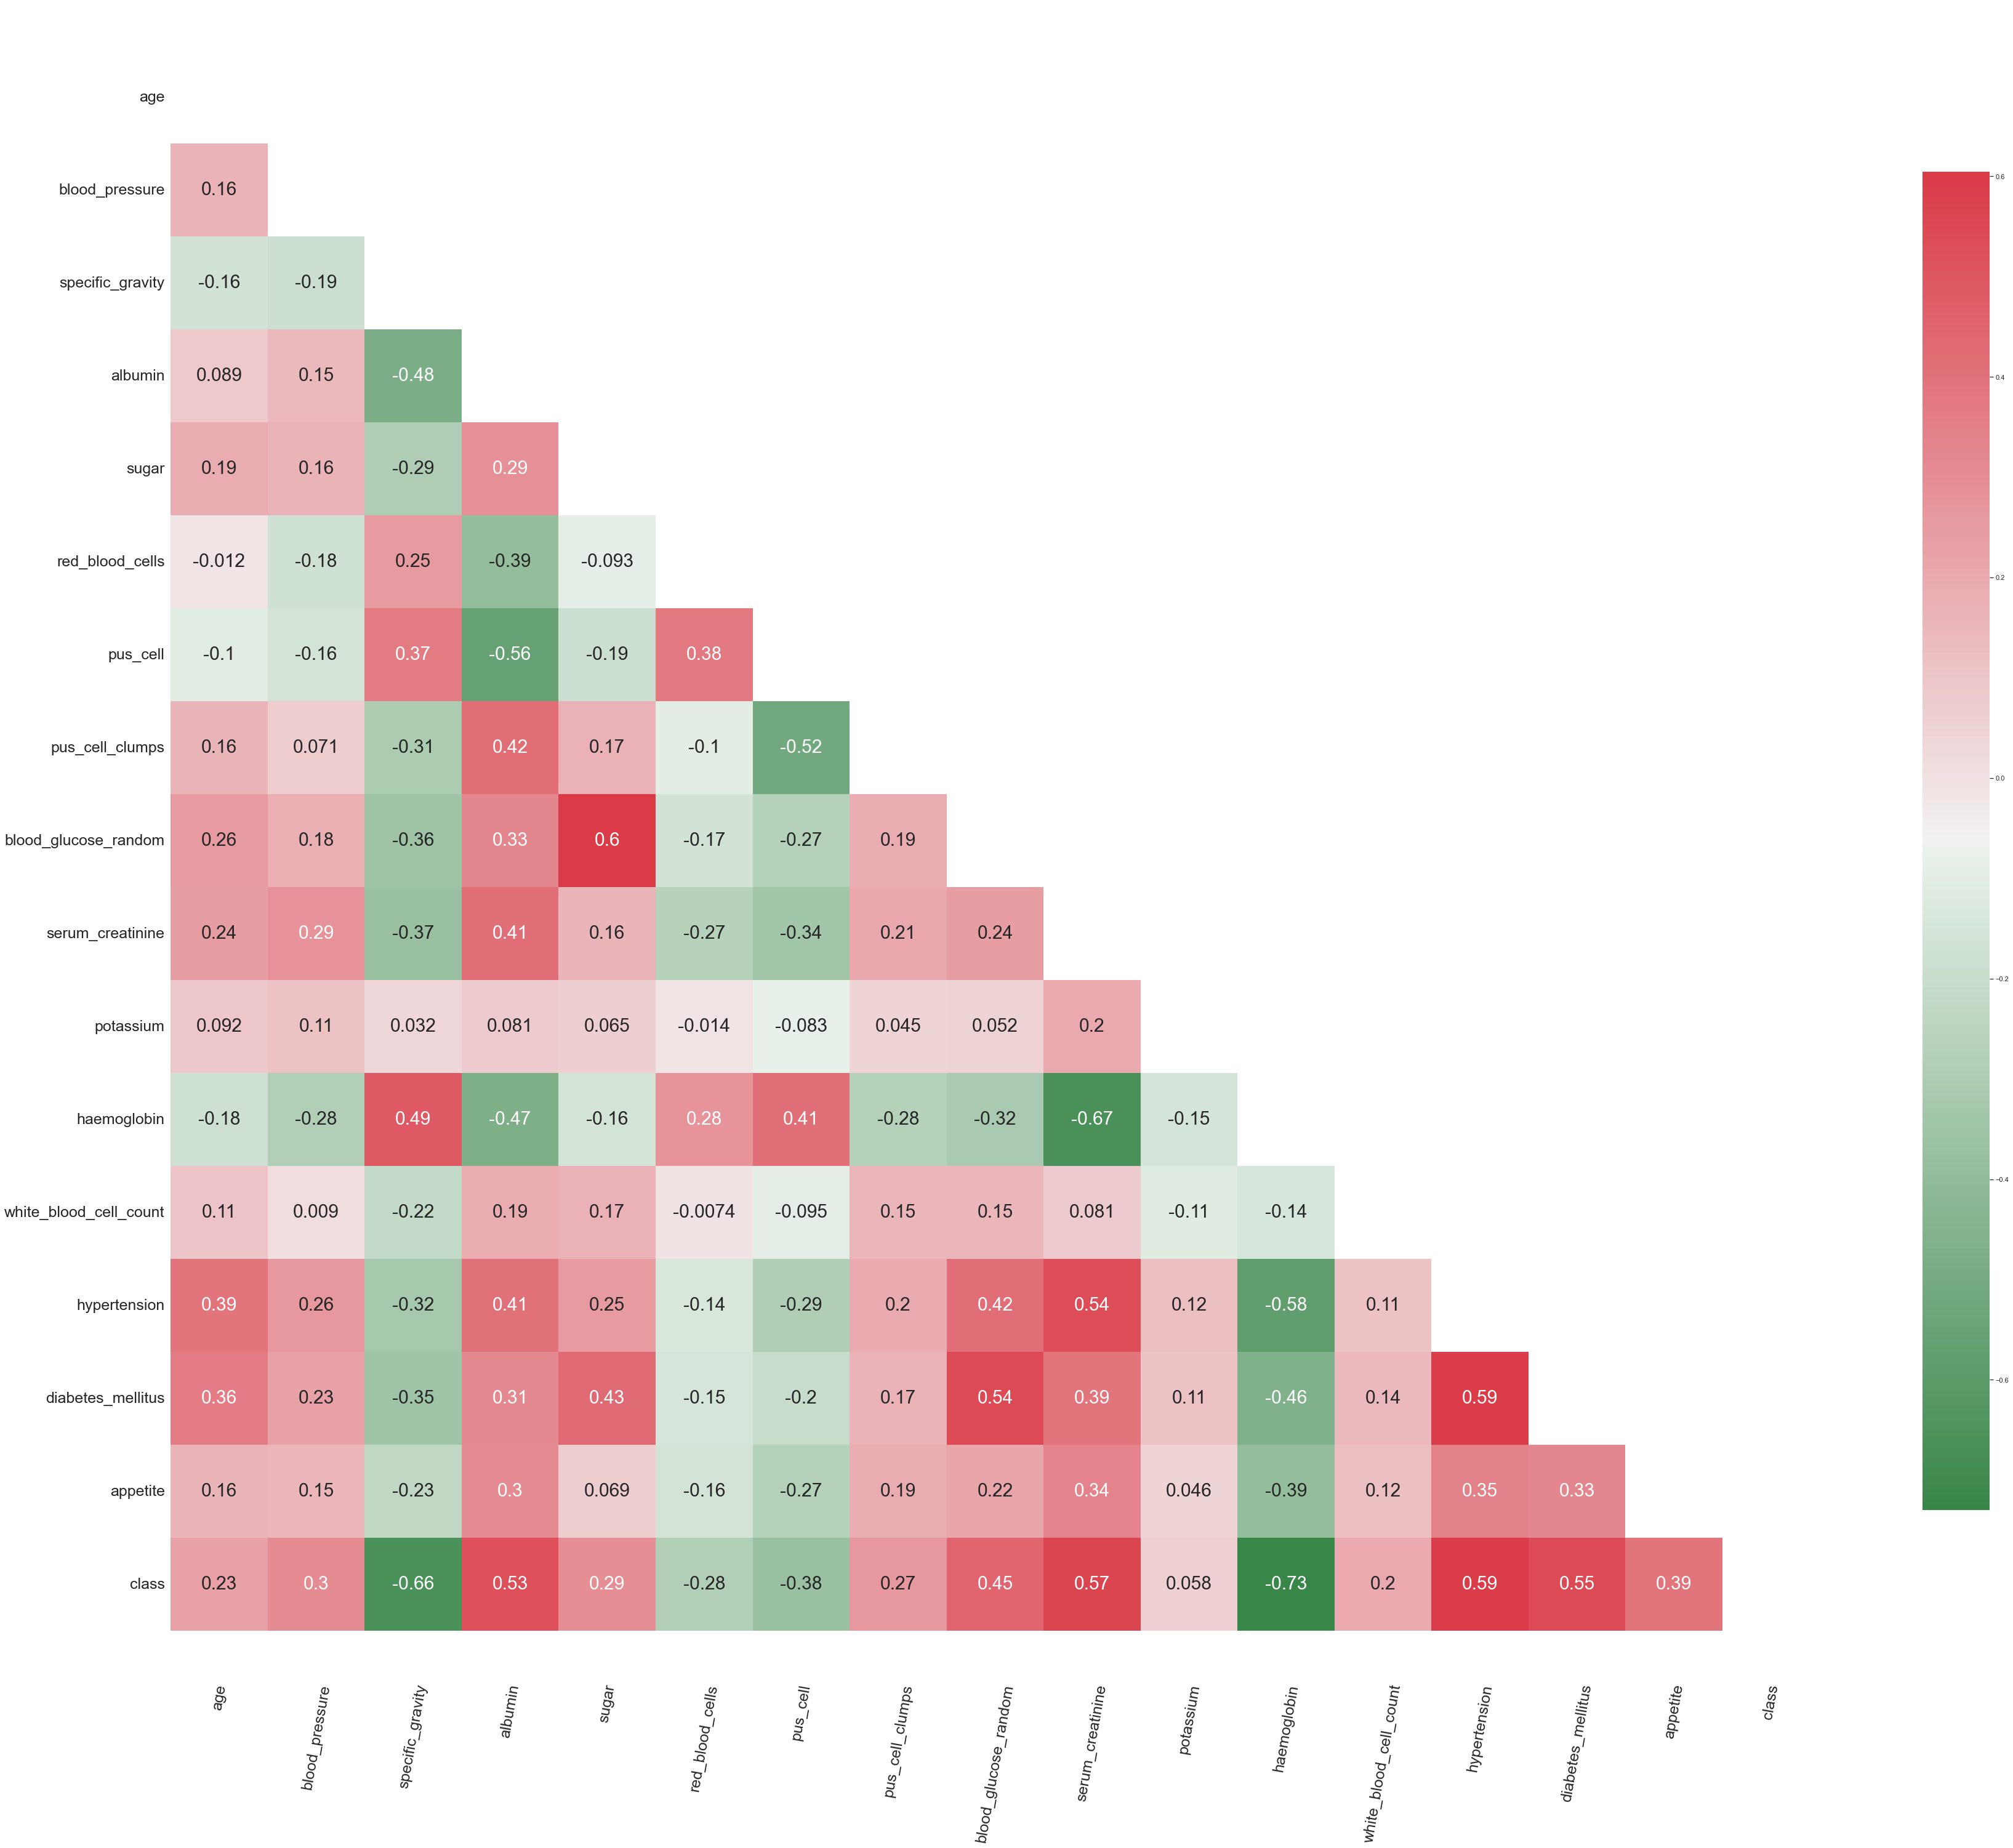

In [158]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = new_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":30},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

after the verification of the correlation matrix following the encoding, there is a strong correlation between sugar and Blood_glucose_random and between serum_creatinine and haemoglobin  

In [159]:
new_df=new_df.drop(columns=['serum_creatinine'],axis=1)
new_df=new_df.drop(columns=['sugar'],axis=1)

In [162]:
new_df.head()

,age,blood_pressure,specific_gravity,albumin,red_blood_cells,pus_cell,pus_cell_clumps,blood_glucose_random,potassium,haemoglobin,white_blood_cell_count,hypertension,diabetes_mellitus,class
0,48.00,80.0,1.020,1.0,1,1,0,121.00000,4.390064,15.4,7800.0,1,2,1
1,8.25,55.0,1.020,4.0,1,1,0,139.97191,4.390064,11.3,6000.0,0,1,1
2,62.00,80.0,1.010,2.0,1,1,0,259.00000,4.390064,9.6,7500.0,0,2,1
3,48.00,70.0,1.005,4.0,1,0,1,117.00000,2.500000,11.2,6700.0,1,1,1
4,51.00,80.0,1.010,2.0,1,1,0,106.00000,4.390064,11.6,7300.0,0,1,1


# Modeling:

In [258]:
df_majority = new_df[df_normalized['class'] == 1]
df_minority = new_df[df_normalized['class'] == 0]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples = len(df_majority),    # to match majority class
                                 random_state= 42) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


## Spliting Dataset: 

In [259]:
from sklearn.model_selection import train_test_split
X =df_upsampled.drop(columns=['class'], axis=1)
y =df_upsampled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## GridSearch (KNN) : 

#### GridSearch after balancing the dataset and Befor the normalisation : 

In [235]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [236]:
grid.best_score_

0.8257142857142856

In [237]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

#### GridSearch after normalisation : 

In [262]:
df_normalized=min_max_scaling(df_upsampled)
X =df_normalized.drop(columns=['class'], axis=1)
y =df_normalized['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [239]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors': np.arange(1,20),'metric':['euclidean','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [240]:
grid.best_score_

0.9771428571428572

In [241]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 1}

## KNN implementation :

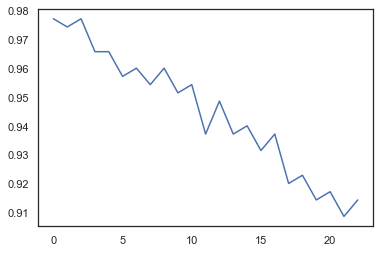

In [242]:
from sklearn.model_selection import cross_val_score     
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
     
val_score = []
for k in range(1, 24):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

In [248]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, knn.predict(X_test))


print(f"Training Accuracy of KNN Classifier is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN Classifier is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN Classifier is 1.0
Test Accuracy of KNN Classifier is 0.9733333333333334 

Confusion Matrix :- 
[[73  1]
 [ 3 73]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        74
         1.0       0.99      0.96      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



[ 30  60  90 120 150 180 210 240 270 300]


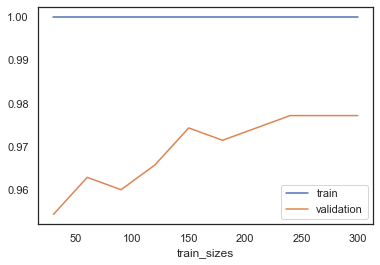

In [249]:
from sklearn.model_selection import learning_curve
     
N, train_score, val_score = learning_curve(knn, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=7)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

we have checked that we are not in the case of overfitting and that the model has a very good score

## Model evaluation(KNN)

Overall Train Accuracy 1.0
Train AUC Score 1.0
Overall Test Accuracy 0.9733333333333334
Test AUC Score 0.9735064011379801
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        74
         1.0       0.99      0.96      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

K-Fold scores: 0.976 (+/- 0.00031)


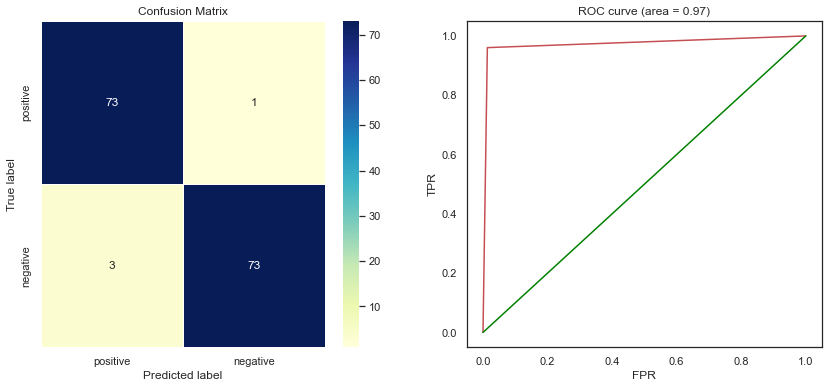

In [346]:
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
model_eval(KNeighborsClassifier(n_neighbors=1),X_train,y_train,X_test,y_test)

## GridSearch(Decision Tree) :

In [269]:
X =df_upsampled.drop(columns=['class'], axis=1)
y =df_upsampled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### GridSearch after balancing the dataset and Befor the normalisation : 

In [270]:
from sklearn.model_selection import GridSearchCV
grid_param_DTR = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [ 2, 3, 5, 7],
    'min_samples_split' : [ 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtr = GridSearchCV(DecisionTreeClassifier(), grid_param_DTR, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtr.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [271]:
print(grid_search_dtr.best_params_)
print(grid_search_dtr.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
0.9857142857142858


#### GridSearch after normalisation : 

In [281]:
df_normalized=min_max_scaling(df_upsampled)
X =df_normalized.drop(columns=['class'], axis=1)
y =df_normalized['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [282]:
from sklearn.model_selection import GridSearchCV
grid_param_DTR = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [ 2, 3, 5, 7],
    'min_samples_split' : [ 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtr = GridSearchCV(DecisionTreeClassifier(), grid_param_DTR, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtr.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [289]:
print(grid_search_dtr.best_params_)
print(grid_search_dtr.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'best'}
0.9914285714285714


## Decision Tree implementation :

In [294]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='auto', min_samples_leaf=2, min_samples_split=7, splitter='best')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of dtc Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of dtc Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")


Training Accuracy of dtc Classifier is 0.9857142857142858
Test Accuracy of dtc Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[71  3]
 [ 2 74]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        74
         1.0       0.96      0.97      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



#### most important feature for decision Tree: 

In [296]:
j=0
for i in dtc.feature_importances_:
    np.set_printoptions(precision=3)
    
    print(i,X_train.columns[j])
    j=j+1

0.0 age
0.039601433683025856 blood_pressure
0.0687904214407732 specific_gravity
0.07202895833181606 albumin
0.0 red_blood_cells
0.0 pus_cell
0.0 pus_cell_clumps
0.008651757402126934 blood_glucose_random
0.016209685475556342 potassium
0.7693092791661302 haemoglobin
0.025408464500571236 white_blood_cell_count
0.0 hypertension
0.0 diabetes_mellitus


[ 28  56  84 112 140 168 196 224 252 280]


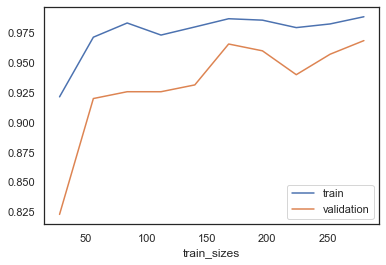

In [297]:
from sklearn.model_selection import learning_curve
     
N, train_score, val_score = learning_curve(dtc, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

## Model Evaluation (Decision Tree):

Overall Train Accuracy 0.98
Train AUC Score 0.9798850574712643
Overall Test Accuracy 0.9733333333333334
Test AUC Score 0.9736842105263157
Classification Report of Test
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        74
         1.0       1.00      0.95      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

K-Fold scores: 0.964 (+/- 0.00095)


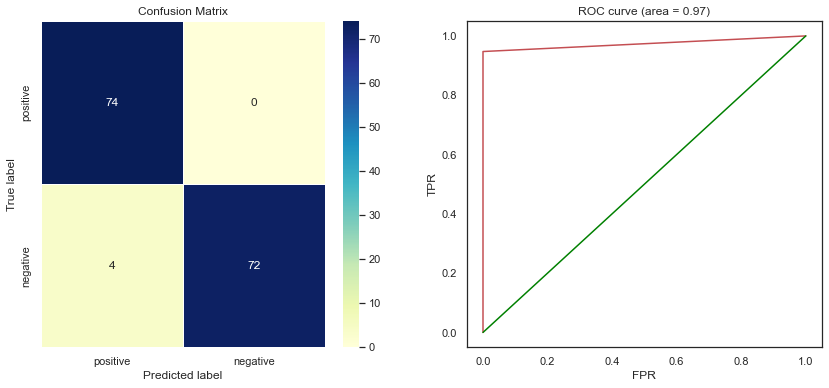

In [348]:
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
model_eval(DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='auto', min_samples_leaf=2, min_samples_split=7, splitter='best'),X_train,y_train,X_test,y_test)

## GridSearch(Random Forest) :

In [309]:
X =df_upsampled.drop(columns=['class'], axis=1)
y =df_upsampled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### GridSearch after balancing the dataset and Befor the normalisation : 

In [310]:
classifier_RDF=RandomForestClassifier()
grid_param_RDF = {
   'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini','entropy']
}

grid_search_rdf = GridSearchCV(classifier_RDF, grid_param_RDF, cv = 5, n_jobs = -1, verbose = 1)
grid_search_rdf.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [311]:
grid_search_rdf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [312]:
grid_search_rdf.best_score_

0.9885714285714287

#### GridSearch after normalisation :

In [341]:
df_normalized=min_max_scaling(df_upsampled)
X =df_normalized.drop(columns=['class'], axis=1)
y =df_normalized['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [314]:
classifier_RDF=RandomForestClassifier()
grid_param_RDF = {
   'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini','entropy']
}

grid_search_rdf = GridSearchCV(classifier_RDF, grid_param_RDF, cv = 5, n_jobs = -1, verbose = 1)
grid_search_rdf.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=1)

In [315]:
grid_search_rdf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [316]:
grid_search_rdf.best_score_

0.9885714285714287

## Random Forest implementation :

In [319]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'auto', n_estimators = 200)
rd_clf.fit(X_train, y_train)
y_pred = rd_clf.predict(X_test)
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of dtc Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of dtc Classifier is {rd_clf_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")


Training Accuracy of dtc Classifier is 0.9942857142857143
Test Accuracy of dtc Classifier is 0.9866666666666667 

Confusion Matrix :- 
[[72  2]
 [ 0 76]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        74
         1.0       0.97      1.00      0.99        76

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



[ 28  56  84 112 140 168 196 224 252 280]


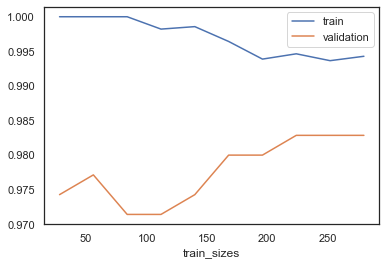

In [352]:
from sklearn.model_selection import learning_curve
     
N, train_score, val_score = learning_curve(rd_clf, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

#### most important feature for Random Forest: 

In [318]:
j=0
for i in rd_clf.feature_importances_:
    np.set_printoptions(precision=3)
    print(i,X_train.columns[j])
    j=j+1


0.012954528319587905 age
0.027519056081162983 blood_pressure
0.18827108548130045 specific_gravity
0.1495223483190529 albumin
0.003094228716748804 red_blood_cells
0.017507750053886374 pus_cell
0.0025669649585165835 pus_cell_clumps
0.056052089377296985 blood_glucose_random
0.007343439723021675 potassium
0.3127334987543141 haemoglobin
0.013841694670648871 white_blood_cell_count
0.09251483431277276 hypertension
0.11607848123168966 diabetes_mellitus


## Model_evaluation(Random Forest) :

Overall Train Accuracy 0.9942857142857143
Train AUC Score 1.0
Overall Test Accuracy 0.9866666666666667
Test AUC Score 1.0
Classification Report of Test
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        74
         1.0       0.97      1.00      0.99        76

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

K-Fold scores: 0.984 (+/- 0.00042)


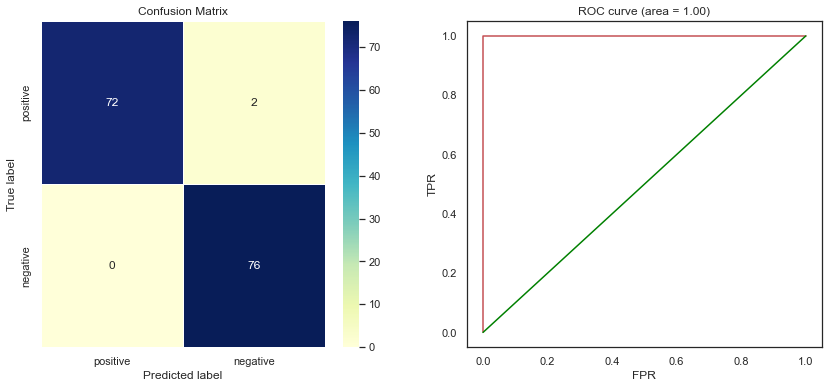

In [353]:
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
model_eval(RandomForestClassifier(criterion = 'gini', max_depth = 4, max_features = 'auto', n_estimators = 200),X_train,y_train,X_test,y_test)

## GridSearch(SVM) :

In [328]:
from sklearn.model_selection import train_test_split
X =df_upsampled.drop(columns=['class'], axis=1)
y =df_upsampled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### GridSearch after balancing the dataset and Befor the normalisation : 

In [329]:
from sklearn import svm 
# defining parameter range
 # Linear Kernel
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.629 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [330]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [331]:
grid.best_score_

0.8342857142857143

#### GridSearch after normalisation 

In [332]:
df_normalized=min_max_scaling(df_upsampled)
X =df_normalized.drop(columns=['class'], axis=1)
y =df_normalized['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [333]:
from sklearn import svm 
# defining parameter range
 # Linear Kernel
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.971 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [334]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [335]:
grid.best_score_

0.9857142857142858

## SVM implementation :

In [350]:
#Import svm model
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#Create a svm Classifier
clf_rfe = svm.SVC(C=10, gamma=1, kernel='rbf')

#Train the model using the training sets
clf_rfe.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf_rfe.predict(X_test)

# accuracy score, confusion matrix and classification report of SVM

clf_acc_ref = accuracy_score(y_test, clf_rfe.predict(X_test))

print(f"Training Accuracy of SVM Classifier is {accuracy_score(y_train, clf_rfe.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {clf_acc_ref} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, clf_rfe.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, clf_rfe.predict(X_test))}")

Training Accuracy of SVM Classifier is 0.9857142857142858
Test Accuracy of Random Forest Classifier is 0.9733333333333334 

Confusion Matrix :- 
[[74  0]
 [ 4 72]]

Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        74
         1.0       1.00      0.95      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



[ 28  56  84 112 140 168 196 224 252 280]


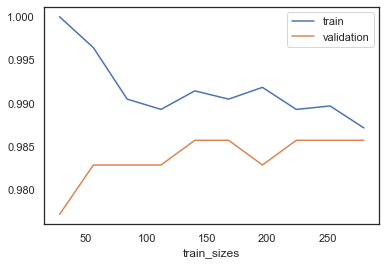

In [351]:
from sklearn.model_selection import learning_curve
     
N, train_score, val_score = learning_curve(clf_rfe, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()